<a href="https://colab.research.google.com/github/armandossrecife/teste/blob/main/check_cuda_by_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [2]:
!pip install numpy

In [3]:
import torch

# Check CUDA availability
# https://pytorch.org/docs/stable/cuda.html
cuda_available = torch.cuda.is_available()

print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Version: {torch.version.cuda}")

if cuda_available:
    print("\nCUDA está disponível!")

    # Device information
    device_count = torch.cuda.device_count()
    current_device = torch.cuda.current_device()

    print(f"\nNúmero de dispositivos CUDA: {device_count}")
    print(f"Índice corrente do dispositivo CUDA: {current_device}")

    for i in range(device_count):
        print(f"\nDispositivo {i}:")
        print(f"  Nome: {torch.cuda.get_device_name(i)}")
        print(f"  Capacidade: {torch.cuda.get_device_capability(i)}")
        print(f"  Memória: {torch.cuda.get_device_properties(i).total_memory / 1024**3:.2f} GB")
else:
    print("\nCUDA não está disponível.")
    print("PyTorch usará CPU")

PyTorch Version: 2.6.0+cu124
CUDA Version: 12.4

CUDA está disponível!

Número de dispositivos CUDA: 1
Índice corrente do dispositivo CUDA: 0

Dispositivo 0:
  Nome: Tesla T4
  Capacidade: (7, 5)
  Memória: 14.74 GB


In [4]:
x = torch.rand(5, 3)
print(x)

tensor([[0.6071, 0.7489, 0.0278],
        [0.3955, 0.0749, 0.5859],
        [0.2988, 0.9598, 0.4580],
        [0.8086, 0.1793, 0.8145],
        [0.5443, 0.3792, 0.3648]])


In [5]:
import time

# Check if CUDA is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

# Matrix dimensions
size = 10000  # Using 10000x10000 for more noticeable performance difference

## CPU Version ##
print("\n=== CPU Execution ===")
# Create random matrices on CPU
# Create matrices with double precision
a_cpu = torch.randn(size, size, dtype=torch.float64)
b_cpu = torch.randn(size, size, dtype=torch.float64)

# Time the multiplication
start_time = time.time()
result_cpu = torch.mm(a_cpu, b_cpu)
cpu_time = time.time() - start_time

print(f"CPU multiplication time: {cpu_time:.6f} seconds")

## GPU Version ##
if torch.cuda.is_available():
    print("\n=== GPU Execution ===")
    # Create random matrices and move to GPU
    a_gpu = a_cpu.to(device)
    b_gpu = b_cpu.to(device)

    # Warm-up (first GPU operation is often slower due to initialization)
    _ = torch.mm(a_gpu, b_gpu)

    # Time the multiplication
    start_time = time.time()
    result_gpu = torch.mm(a_gpu, b_gpu)
    gpu_time = time.time() - start_time

    print(f"GPU multiplication time: {gpu_time:.6f} seconds")
    print(f"Speedup factor: {cpu_time/gpu_time:.2f}x")

    # Verify results match (optional)
    torch.testing.assert_close(result_cpu, result_gpu.cpu(), rtol=1e-4, atol=1e-4)
    print("Results match between CPU and GPU!")
else:
    print("\nGPU not available, skipping GPU execution")

Using device: cuda

=== CPU Execution ===
CPU multiplication time: 58.060891 seconds

=== GPU Execution ===
GPU multiplication time: 0.000359 seconds
Speedup factor: 161703.20x
Results match between CPU and GPU!


In [6]:
!pip3 install torchvision

In [7]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [8]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26.4M/26.4M [00:01<00:00, 17.3MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 304kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.61MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 10.1MB/s]


In [9]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


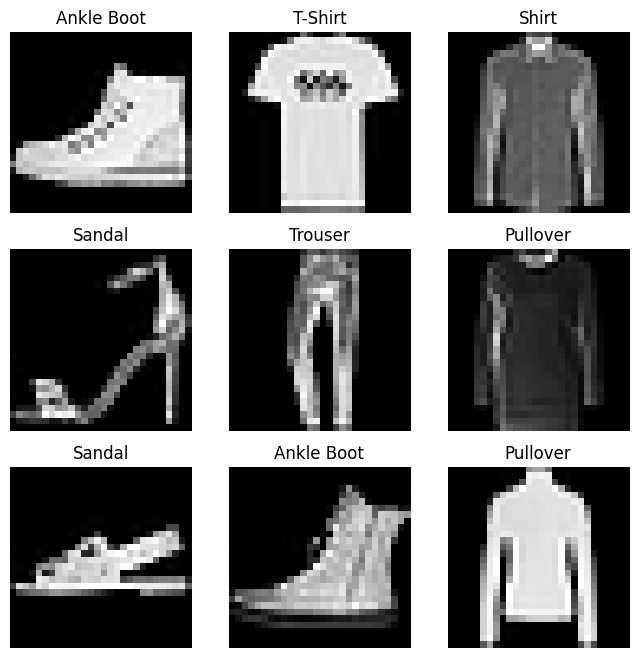

In [10]:
import matplotlib.pyplot as plt

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [11]:
from torch import nn, optim
from torchvision import datasets, transforms

# Set random seed for reproducibility
torch.manual_seed(42)

# 1. Prepare Dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [12]:
# Download training and test data
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=transform
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=transform
)

In [14]:
# Create data loaders
batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Class labels
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# 2. Define Model
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [15]:
# 3. Initialize Model, Loss, and Optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
model = FashionMNISTModel().to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [16]:
# 4. Training Function
def train(dataloader, model, loss_fn, optimizer):
    model.train()
    train_loss, correct = 0, 0
    for X, y in dataloader:
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Track metrics
        train_loss += loss.item()
        correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    train_loss /= len(dataloader)
    accuracy = 100 * correct / len(dataloader.dataset)
    return train_loss, accuracy

# 5. Test Function
def test(dataloader, model, loss_fn):
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= len(dataloader)
    accuracy = 100 * correct / len(dataloader.dataset)
    return test_loss, accuracy

In [17]:
# 6. Training Loop
epochs = 10
train_losses, test_losses = [], []
train_accs, test_accs = [], []

for epoch in range(epochs):
    train_loss, train_acc = train(train_loader, model, loss_fn, optimizer)
    test_loss, test_acc = test(test_loader, model, loss_fn)

    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

    print(f"Epoch {epoch+1}/{epochs}:")
    print(f"  Train Loss: {train_loss:.4f} | Accuracy: {train_acc:.2f}%")
    print(f"  Test Loss:  {test_loss:.4f} | Accuracy: {test_acc:.2f}%")

Epoch 1/10:
  Train Loss: 0.4799 | Accuracy: 82.32%
  Test Loss:  0.4174 | Accuracy: 84.84%
Epoch 2/10:
  Train Loss: 0.3625 | Accuracy: 86.56%
  Test Loss:  0.3881 | Accuracy: 85.29%
Epoch 3/10:
  Train Loss: 0.3251 | Accuracy: 87.83%
  Test Loss:  0.3718 | Accuracy: 86.71%
Epoch 4/10:
  Train Loss: 0.2991 | Accuracy: 88.88%
  Test Loss:  0.3667 | Accuracy: 87.33%
Epoch 5/10:
  Train Loss: 0.2833 | Accuracy: 89.32%
  Test Loss:  0.3573 | Accuracy: 87.58%
Epoch 6/10:
  Train Loss: 0.2598 | Accuracy: 90.30%
  Test Loss:  0.3434 | Accuracy: 87.91%
Epoch 7/10:
  Train Loss: 0.2478 | Accuracy: 90.73%
  Test Loss:  0.3419 | Accuracy: 87.88%
Epoch 8/10:
  Train Loss: 0.2310 | Accuracy: 91.22%
  Test Loss:  0.3476 | Accuracy: 88.04%
Epoch 9/10:
  Train Loss: 0.2205 | Accuracy: 91.69%
  Test Loss:  0.3304 | Accuracy: 88.76%
Epoch 10/10:
  Train Loss: 0.2047 | Accuracy: 92.18%
  Test Loss:  0.3490 | Accuracy: 88.25%


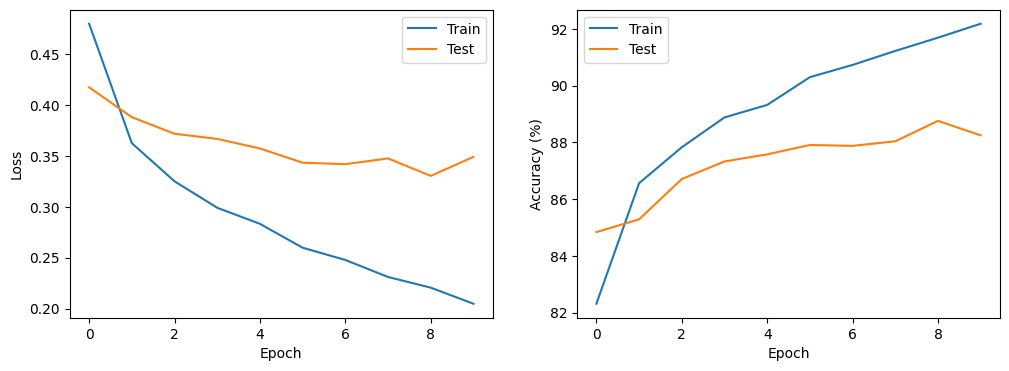

In [18]:
# 7. Plot Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accs, label='Train')
plt.plot(test_accs, label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()

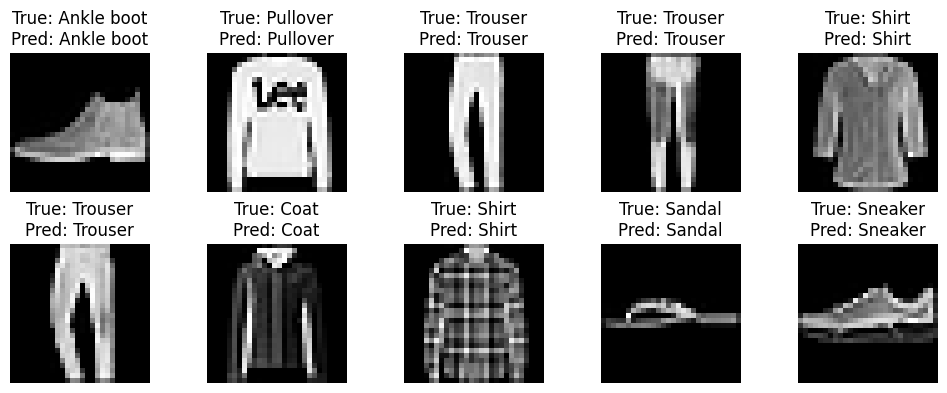

In [19]:
# 8. Sample Predictions
model.eval()
sample_images, sample_labels = next(iter(test_loader))
with torch.no_grad():
    sample_images, sample_labels = sample_images.to(device), sample_labels.to(device)
    preds = model(sample_images).argmax(1)

# Plot sample predictions
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(sample_images[i].cpu().squeeze(), cmap='gray')
    plt.title(f"True: {classes[sample_labels[i]]}\nPred: {classes[preds[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()